In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

Перед тем как выполнить задания, вам необходимо установить несколько библиотек (если они у вас не установлены):

In [43]:
#!pip install xgboost
#!pip install catboost

- Gender — пол пассажира (женский, мужской);
- Customer Type — тип клиента (постоянный/непостоянный клиент);
- Age — возраст клиента;
- Type of Travel — цель перелета (личная/деловая поездка);
- Class — туристический класс пассажира (Business, Eco, Eco Plus);
- Flight distance — расстояние полета;
- Inflight wifi service — уровень удовлетворённости Wi-Fi (0 — не применимо, 1–5);
- Departure/Arrival time convenient — уровень удовлетворённости временем отправления и прибытия;
- Ease of Online booking — уровень удовлетворённости онлайн-бронированием;
- Gate location — уровень удовлетворённости расположением выхода на посадку;
- Food and drink — уровень удовлетворённости едой и напитками;
- Online boarding — уровень удовлетворённости онлайн-регистрацией;
- Seat comfort — уровень удовлетворённости комфортом сидений;
- Inflight entertainment — уровень удовлетворённости развлечениями на борту;
- On-board service — уровень удовлетворённости сервисом на борту;
- Leg room service — уровень удовлетворённости местом для ног;
- Baggage handling — уровень удовлетворённости обработкой багажа;
- Check-in service — уровень удовлетворённости услугами регистрации;
- Inflight service — уровень удовлетворённости обслуживанием во время полёта;
- Cleanliness — уровень удовлетворённости чистотой;
- Departure Delay in Minutes — задержка при отправлении (в минутах);
- Arrival Delay in Minutes — задержка при прибытии (в минутах);
- Satisfaction — удовлетворённость авиакомпанией — целевая переменная (satisfaction/neutral/dissatisfaction).

In [44]:
# Загружаем данные
df = pd.read_csv('data/AirPass.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [46]:
df.drop(columns=['Unnamed: 0'], inplace=True)

Для начала сделаем небольшую предобработку данных. Сколько всего в данных пропущенных значений?

In [47]:
# Подсчитываем количество пропусков по каждому столбцу
missing_per_column = df.isnull().sum()

# Общая сумма пропущенных значений
total_missing = missing_per_column.sum()

print(f"Всего пропущенных значений в данных: {total_missing}")


Всего пропущенных значений в данных: 310


Теперь давайте избавимся от найденных пропусков. Заполните их все медианными значениями. После этого вычислите среднее арифметическое для признака, отражающего задержку при прибытии в минутах. Ответ округлите до двух знаков после точки-разделителя.

In [48]:
df.fillna(df.median(numeric_only=True), inplace=True)


In [49]:
mean_arrival_delay = df['Arrival Delay in Minutes'].mean()
print(f"Среднее значение задержки прибытия: {mean_arrival_delay:.2f}")


Среднее значение задержки прибытия: 15.13


Проведём небольшой разведывательный анализ. Посмотрим, в каких категориях пассажиров превалировали удовлетворённые полетом клиенты. 

Совет: для ответов на вопросы попробуйте использовать как вычисления, так и визуализации. 

1. Сравните удовлетворённость полётом мужчин и женщин. Выберите верное утверждение: 
2. Теперь сравним категории пассажиров в зависимости от их цели поездки. Выберите все верные утверждения: 
3. В каком туристическом классе наибольший процент довольных клиентов?

1. Сравнение удовлетворённости мужчин и женщин

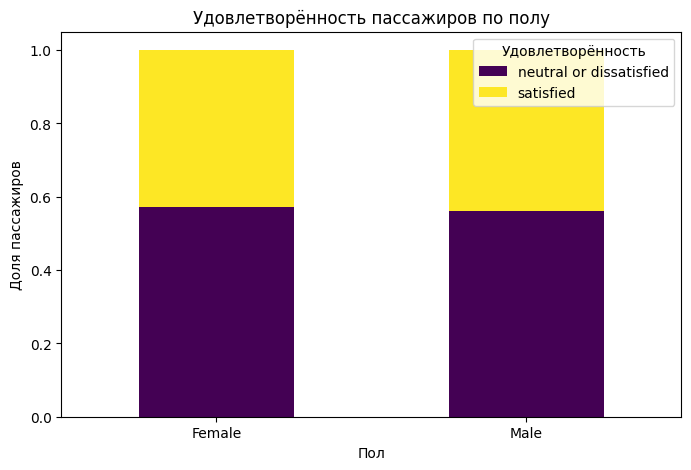

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Распределение удовлетворённости по полу
gender_satisfaction = df.groupby('Gender')['satisfaction'].value_counts(normalize=True).unstack()

# Визуализация
gender_satisfaction.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='viridis')
plt.title('Удовлетворённость пассажиров по полу')
plt.ylabel('Доля пассажиров')
plt.xlabel('Пол')
plt.xticks(rotation=0)
plt.legend(title="Удовлетворённость")
plt.show()


2. Сравнение удовлетворённости по цели поездки

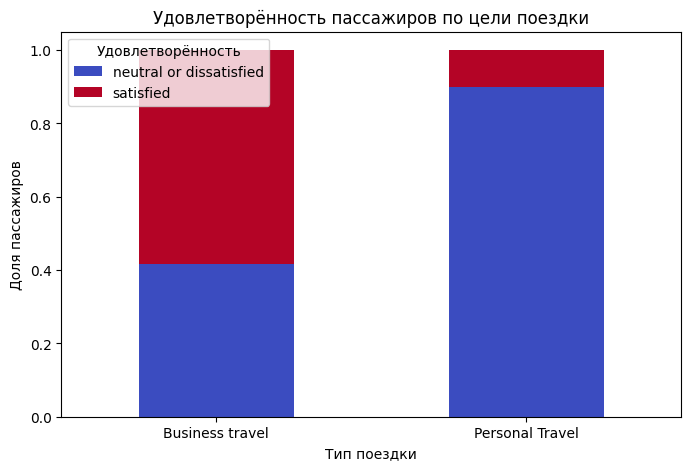

In [51]:
# Анализ удовлетворённости в зависимости от типа поездки
travel_satisfaction = df.groupby('Type of Travel')['satisfaction'].value_counts(normalize=True).unstack()

# Визуализация
travel_satisfaction.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='coolwarm')
plt.title('Удовлетворённость пассажиров по цели поездки')
plt.ylabel('Доля пассажиров')
plt.xlabel('Тип поездки')
plt.xticks(rotation=0)
plt.legend(title="Удовлетворённость")
plt.show()


3. Определение туристического класса с наибольшим процентом довольных клиентов

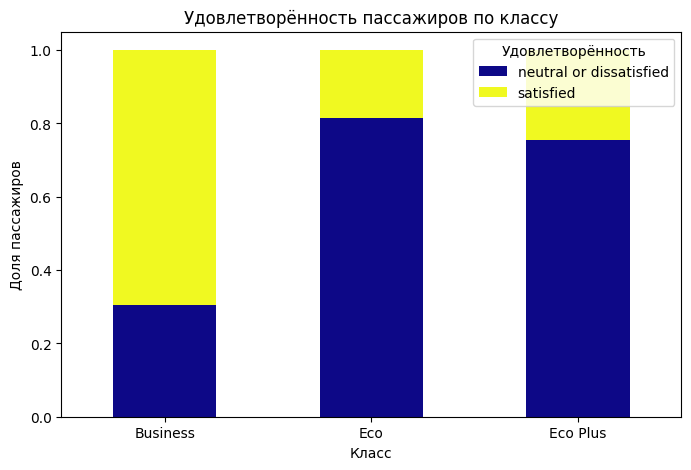

In [52]:
# Анализ удовлетворённости по туристическому классу
class_satisfaction = df.groupby('Class')['satisfaction'].value_counts(normalize=True).unstack()

# Визуализация
class_satisfaction.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='plasma')
plt.title('Удовлетворённость пассажиров по классу')
plt.ylabel('Доля пассажиров')
plt.xlabel('Класс')
plt.xticks(rotation=0)
plt.legend(title="Удовлетворённость")
plt.show()


Перекодируем часть бинарных признаков, чтобы использовать их при обучении:

In [53]:
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer':1, 'disloyal Customer':0})
df['Type of Travel'] = df['Type of Travel'].map({'Personal Travel':0, 'Business travel':1})
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

Для остальных категориальных признаков создайте dummy-переменные. Сделайте это с помощью функции get_dummies() из библиотеки Pandas, параметры не меняйте. Сколько теперь признаков в данных (включая целевую переменную)?

1. Определяем категориальные признаки для кодирования

In [54]:
categoricals = ['Class']  # Единственный оставшийся категориальный признак
df_encoded = pd.get_dummies(df, columns=categoricals)


2. Определяем количество признаков (включая целевую переменную)

In [55]:
num_features = df_encoded.shape[1]
print(f"Количество признаков в данных после кодировки: {num_features}")


Количество признаков в данных после кодировки: 26


Мы практически добрались до обучения модели. Разбейте данные на обучающую и тестовую выборки в соотношении 80/20, параметр random_state = 26. Сколько наблюдений попало в тестовую выборку?

In [56]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop(columns=['satisfaction'])  # Удаляем целевую переменную из данных
y = df_encoded['satisfaction']  # Целевая переменная
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)
num_test_samples = len(X_test)
print(f"Количество наблюдений в тестовой выборке: {num_test_samples}")

Количество наблюдений в тестовой выборке: 20781


Теперь нам необходимо реализовать масштабирование данных. Для этого обучите на обучающей выборке метод StandardScaler() и с помощью него преобразуйте и обучающую, и тестовую выборки. Не забудьте, что целевую переменную обрабатывать не нужно.

Примечание. Отметим, что если бы дальше мы работали только с деревьями, масштабирование бы не требовалось. Однако мы реализуем его, чтобы можно было обучать и другие модели и сравнивать полученные результаты.

В качестве ответа введите самое первое значение из матрицы преобразованных признаков тестовой выборки. Округлите значение до двух знаков после точки-разделителя.

In [57]:
from sklearn.preprocessing import StandardScaler


# Инициализируем масштабировщик
scaler = StandardScaler()

# Обучаем и преобразуем обучающую выборку
X_train_scaled = scaler.fit_transform(X_train)

# Применяем то же преобразование к тестовой выборке
X_test_scaled = scaler.transform(X_test)


first_value = X_test_scaled[0, 0]
print(f"Первое значение после масштабирования: {first_value:.2f}")



Первое значение после масштабирования: 0.94


Перейдём к обучению моделей. В качестве первой модели возьмём самую простую — логистическую регрессию. Мы делаем это для того, чтобы потом сравнивать с ней полученные результаты: так вы сможете выяснить, насколько ансамбли смогут улучшить точность прогноза.

Обучите логистическую регрессию с параметрами по умолчанию на наших данных. В качестве ответа введите значение метрики f1_score. Ответ округлите до трёх знаков после точки-разделителя.

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score


# Создаём модель логистической регрессии с параметрами по умолчанию
log_reg = LogisticRegression()

# Обучаем модель на масштабированных данных
log_reg.fit(X_train_scaled, y_train)


# Предсказания на тестовой выборке
y_pred = log_reg.predict(X_test_scaled)

# Вычисляем F1-метрику
f1 = f1_score(y_test, y_pred)

print(f"F1-метрика для логистической регрессии: {f1:.3f}")


F1-метрика для логистической регрессии: 0.855


Теперь перейдём к бустингу. Начнём с обучения первой модели — AdaBoost. В качестве базовой модели для неё возьмите решающее дерево с параметром random_state = 26.

Обучите AdaBoost, зафиксировав random_state со значением 26 и задав темп обучения 0.01. В качестве ответа введите значение метрики f1_score. Ответ округлите до трёх знаков после точки-разделителя.

In [59]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score


# Инициализируем базовое решающее дерево
base_tree = DecisionTreeClassifier(random_state=26)

# Создаём модель AdaBoost с темпом обучения 0.01
ada_clf = AdaBoostClassifier(estimator=base_tree, learning_rate=0.01, random_state=26)

# Обучаем модель на масштабированных данных
ada_clf.fit(X_train_scaled, y_train)


# Делаем предсказания на тестовой выборке
y_pred = ada_clf.predict(X_test_scaled)

# Вычисляем F1-метрику
f1 = f1_score(y_test, y_pred)

print(f"F1-метрика для модели AdaBoost: {f1:.3f}")


F1-метрика для модели AdaBoost: 0.940


Перейдем к следующему алгоритму — градиентному бустингу.

Будем настраивать количество деревьев и темп обучения, делая перебор по следующей сетке:

params = {"n_estimators":2**np.arange(8), "learning_rate":0.1**np.arange(3)}
Используйте для поиска оптимальных параметров GridSearchCV, а для ускорения работы алгоритма задайте параметр кросс-валидации, равный 3.

Какое наибольшее значение метрики f1_score получилось? Ответ округлите до трёх знаков после точки-разделителя.

Примечание. Необходимо указать лучший результат в методе GridSearchCV на тренировочных данных.

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import numpy as np


# Определение сетки гиперпараметров
params = {"n_estimators": 2**np.arange(8), "learning_rate": 0.1**np.arange(3)}


# Создаём модель градиентного бустинга
gb_clf = GradientBoostingClassifier(random_state=26)

# Запускаем GridSearchCV с кросс-валидацией cv=3
grid_search = GridSearchCV(gb_clf, params, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_f1_train = grid_search.best_score_
print(f"Наибольшее значение F1-метрики на тренировочных данных: {best_f1_train:.3f}")


Наибольшее значение F1-метрики на тренировочных данных: 0.949


Обучите алгоритм XGBoost. Так как он достаточно мощный «из коробки», определите его с параметрами по умолчанию, только задайте random_state = 26. Какое значение метрики f1_score получилось? Ответ округлите до трёх знаков после точки-разделителя.

Подсказка. Для того чтобы обучить алгоритм XGBoost для решения задачи классификации, вам понадобится XGBClassifier из библиотеки xgboost, установленной ранее. Вся дальнейшая последовательность действий (обучение модели, предсказание, оценка качества) идентична другим алгоритмам, например логистической регрессии.

In [61]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score


# Создаём модель XGBoost с параметрами по умолчанию и фиксируем случайность
xgb_clf = XGBClassifier(random_state=26)

# Обучаем модель на масштабированных данных
xgb_clf.fit(X_train_scaled, y_train)


# Делаем предсказания на тестовой выборке
y_pred = xgb_clf.predict(X_test_scaled)

# Вычисляем F1-метрику
f1 = f1_score(y_test, y_pred)

print(f"F1-метрика для модели XGBoost: {f1:.3f}")


F1-метрика для модели XGBoost: 0.957


Обучите алгоритм CatBoost. Как и XGBoost, будем обучать его с настройками по умолчанию и заданным random_state = 26. Какое значение метрики f1_score получилось? Ответ округлите до трёх знаков после точки-разделителя.

Подсказка. Для того чтобы обучить алгоритм CatBoost, вам понадобится CatBoostClassifier() из библиотеки catboost, установленной ранее. Вся дальнейшая последовательность действий (обучение модели, предсказание, оценка качества) идентична другим алгоритмам, например логистической регрессии.

In [62]:
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score


# Создаём модель CatBoost с параметрами по умолчанию и фиксируем случайность
catboost_clf = CatBoostClassifier(random_state=26, verbose=0)  # verbose=0 отключает вывод в консоль

# Обучаем модель на масштабированных данных
catboost_clf.fit(X_train_scaled, y_train)


# Делаем предсказания на тестовой выборке
y_pred = catboost_clf.predict(X_test_scaled)

# Вычисляем F1-метрику
f1 = f1_score(y_test, y_pred)

print(f"F1-метрика для модели CatBoost: {f1:.3f}")


F1-метрика для модели CatBoost: 0.961


Выведите матрицу ошибок для алгоритма, который получил наилучшие показатели качества модели на обучающей выборке (будем считать, что оцениваем по f1_score). 
Значения в матрице ошибок переведите в проценты от общего числа наблюдений в обучающей выборке и округлите до целых.

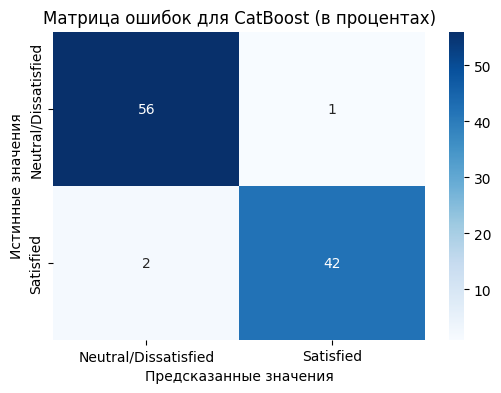

Матрица ошибок (в процентах):
[[56  1]
 [ 2 42]]


In [67]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Делаем предсказания на обучающей выборке (так как оцениваем по f1_score)
y_train_pred = catboost_clf.predict(X_train_scaled)

# Получаем матрицу ошибок
conf_matrix = confusion_matrix(y_train, y_train_pred)

# Переводим значения в проценты
conf_matrix_percent = np.round((conf_matrix / len(y_train)) * 100).astype(int)

# Визуализация матрицы ошибок
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_percent, annot=True, fmt='d', cmap='Blues', xticklabels=['Neutral/Dissatisfied', 'Satisfied'], yticklabels=['Neutral/Dissatisfied', 'Satisfied'])
plt.xlabel('Предсказанные значения')
plt.ylabel('Истинные значения')
plt.title('Матрица ошибок для CatBoost (в процентах)')
plt.show()

# Вывод процентной матрицы
print("Матрица ошибок (в процентах):")
print(conf_matrix_percent)


Оцените важность признаков для модели из предыдущего задания. Отметьте признак, который оказывает наибольшее влияние на значение целевой переменной:

In [68]:
import pandas as pd

# Получаем важность признаков из CatBoost
feature_importances = catboost_clf.get_feature_importance()

# Создаём DataFrame для удобства отображения
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Сортируем по значимости
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Выводим признак с наибольшим влиянием
most_important_feature = importance_df.iloc[0]
print(f"Наиболее значимый признак: {most_important_feature['Feature']}")
print(importance_df.head())  # Покажем топ-5 признаков


Наиболее значимый признак: Inflight wifi service
                  Feature  Importance
6   Inflight wifi service   25.212187
4          Type of Travel   17.820293
11        Online boarding    7.391229
2           Customer Type    7.136633
22         Class_Business    5.639063
